In [1]:
# Load the autoreload extension
%load_ext autoreload

# Set autoreload mode
%autoreload 2

# 1. Setup

In [3]:
import numpy as np
import torch 
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt 

from mermaidseg.datasets.dataset import MermaidDataset, CoralNetDataset
from mermaidseg.visualization import get_legend_elements

In [4]:
device_count = torch.cuda.device_count()
for i in range(device_count):
    print(f"CUDA Device {i}: {torch.cuda.get_device_name(i)}")
    
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

# 2. Data

## 2.1 Mermaid

In [5]:
dataset = MermaidDataset()

In [6]:
len(dataset)

2166

In [7]:
dataset.df_images.head()

,image_id,region_id,region_name
0,00059a47-03b8-47f3-adf6-3ab5616922cf,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
1,0032dba6-8357-42e2-bace-988f99032286,983267a0-7349-4d3e-a23e-fb9353ca8ba5,Central Indo-Pacific
2,004ed958-bdd4-453d-83ed-bf773c78bfc8,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
3,0055fc63-bcce-485b-bb3b-5384c08ad87f,983267a0-7349-4d3e-a23e-fb9353ca8ba5,Central Indo-Pacific
4,0072906a-2d45-41ee-84ab-855d5f740028,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific


In [8]:
dataset.df_annotations.head()

,id,image_id,point_id,row,col,benthic_attribute_id,benthic_attribute_name,growth_form_id,growth_form_name,updated_on,region_id,region_name
0,adf9f72c-f498-454b-b4c2-d3cb6a2d1c5f,00059a47-03b8-47f3-adf6-3ab5616922cf,44044125-e1b8-4580-8531-acaf18a66935,457,467,30a987e9-b420-4db6-a83a-a1f7cabd14fb,Soft coral,None,None,2025-08-26 14:55:15.009823+00:00,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
1,0e97b960-cc38-49ed-91c6-f760f1eff354,00059a47-03b8-47f3-adf6-3ab5616922cf,e8c950a2-c37f-4f5e-8797-3f2d244257b6,457,934,b76bca12-884b-4404-bb9f-97d505b0fe58,Sand,None,None,2025-08-26 14:55:15.039272+00:00,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
2,1823ca56-edac-459e-b009-46c390f64afe,00059a47-03b8-47f3-adf6-3ab5616922cf,766bd109-c9f7-4489-8215-f2a46ffd9419,457,1401,d9086647-3a82-4634-97bc-6e10347af39b,Bare substrate,None,None,2025-08-26 14:55:15.085659+00:00,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
3,dc9d3b2d-b9f9-4a46-a208-790b5c3b2ec3,00059a47-03b8-47f3-adf6-3ab5616922cf,6aaaea05-f005-4e3e-a9bf-d6702e0b7736,457,1868,ed2332ed-0762-45fb-87a3-d315e218faf1,Rubble,None,None,2025-08-26 14:55:15.133907+00:00,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific
4,9bde5850-bb38-4ca3-88b3-43799f53f0ea,00059a47-03b8-47f3-adf6-3ab5616922cf,bed04244-e299-4eec-b9b7-05e15dbf5a75,457,2335,ed2332ed-0762-45fb-87a3-d315e218faf1,Rubble,None,None,2025-08-26 14:55:15.181096+00:00,1d31d9ea-e78d-438b-8667-0d63d1aba257,Western Indo-Pacific


In [9]:
image, mask, annotations = dataset[0]

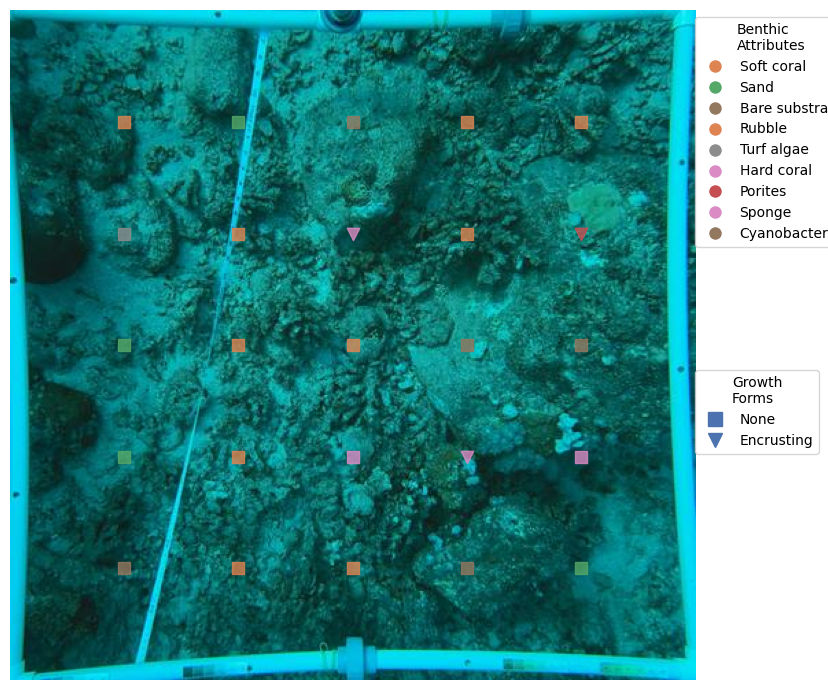

In [11]:
fig, ax = plt.subplots(figsize = (8.5, 7), layout = "tight")
plt.imshow(image)
for i, annotation in annotations.iterrows():
    plt.scatter(annotation['col'], annotation['row'], 
                color=annotation["benthic_color"],
                marker=annotation["growth_form_marker"], 
                s=80,
                alpha=0.8)

benthic_legend_elements, growth_legend_elements = get_legend_elements(annotations, include_growth_form = True)

first_legend = plt.legend(handles=benthic_legend_elements, bbox_to_anchor=(0.99, 1), 
                            loc='upper left', title='Benthic\nAttributes')
plt.gca().add_artist(first_legend)
plt.legend(handles=growth_legend_elements, bbox_to_anchor=(0.99, 0.4), 
          loc='center left', title='Growth\nForms')

plt.axis("off")
plt.show()

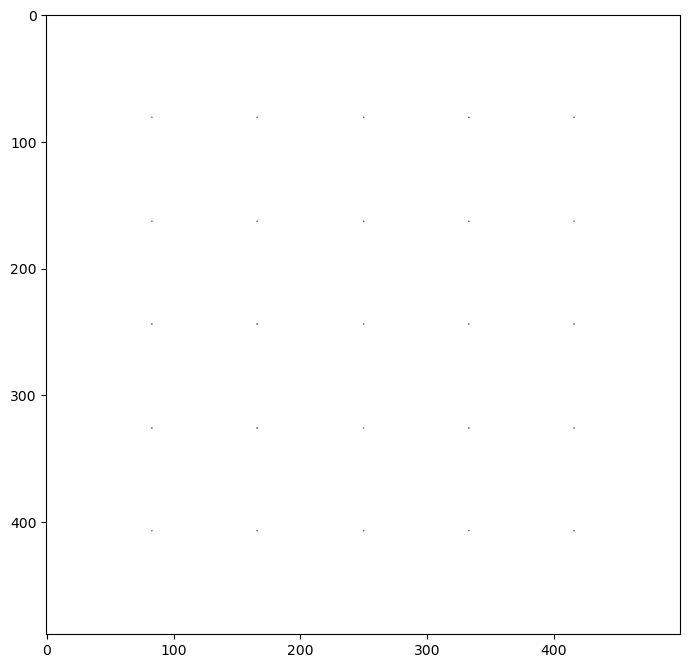

In [12]:
fig, ax = plt.subplots(figsize = (7, 7), layout = "tight")
plt.imshow(np.where(mask>0, mask, np.nan), cmap = "tab10")
plt.show()

In [13]:
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2, drop_last=True)
len(data_loader)

1083

## 2.2 Mermaid

In [16]:
dataset = CoralNetDataset(source_ids=[5027, 23, 3329])

Initialize CoralNet to Mermaid LabelMapping
Reading annotations from sources


3it [00:01,  1.78it/s]


In [17]:
len(dataset)

794

In [18]:
dataset.df_images.head()

,source_id,image_id
0,5027,4202593
1,5027,4202594
2,5027,4202595
3,5027,4202596
4,5027,4202597


In [19]:
dataset.df_annotations.head()

,source_id,image_id,row,col,benthic_attribute_name
0,5027,4202593,57,313,None
1,5027,4202593,136,1023,None
2,5027,4202593,299,755,None
3,5027,4202593,254,909,None
4,5027,4202593,380,1522,None


In [20]:
image, mask, annotations = dataset[0]

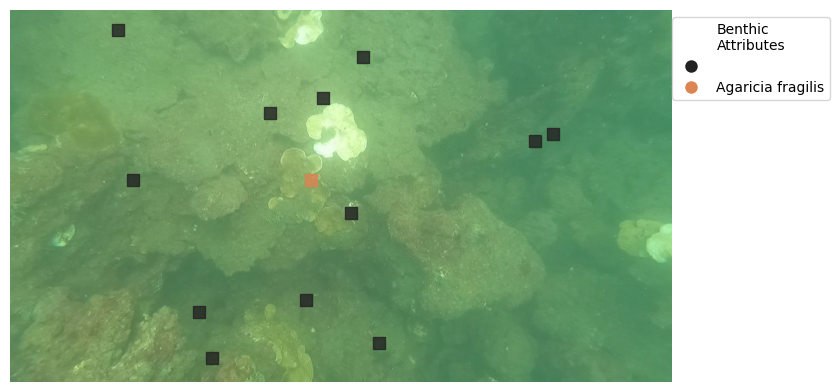

In [24]:
fig, ax = plt.subplots(figsize = (8.5, 7), layout = "tight")
plt.imshow(image)
for i, annotation in annotations.iterrows():
    plt.scatter(annotation['col'], annotation['row'], 
                color=annotation["benthic_color"],
                marker="s", 
                s=80,
                alpha=0.8)

benthic_legend_elements = get_legend_elements(annotations)

plt.legend(handles=benthic_legend_elements, bbox_to_anchor=(0.99, 1), 
          loc='upper left', title='Benthic\nAttributes')
plt.axis("off")
plt.show()

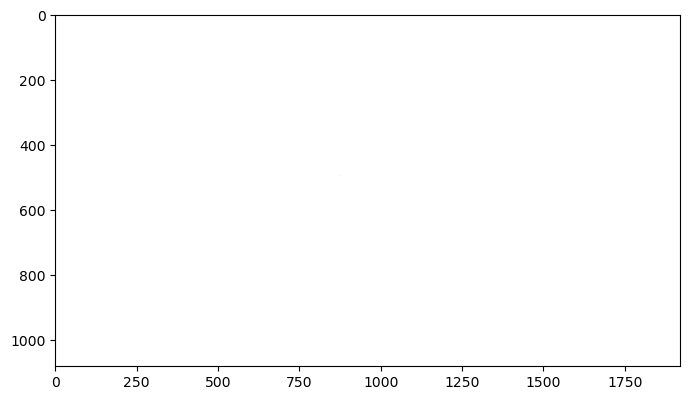

In [25]:
fig, ax = plt.subplots(figsize = (7, 7), layout = "tight")
plt.imshow(np.where(mask>0, mask, np.nan), cmap = "tab10")
plt.show()

In [26]:
data_loader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2, drop_last=True)
len(data_loader)

397